# Medical Data Visualizer
This is the third project in freeCodeCamp's Data Analysis with Python Certificate. The original project was submitted on Replit and moved to Jupyter for increased readability and access. The original project can be viewed [here](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer). 

### Instructions
Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:
- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
- Clean the data. Filter out the following patient segments that represent incorrect data:
    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    height is more than the 97.5th percentile
    weight is less than the 2.5th percentile
    weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

### Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/cr2230/data-analysis-projects-freecodecamp/main/Medical%20Data%20Visualizer/medical_examination.csv')

# Add 'overweight' column
df['height'] = df['height'] / 100
BMI = df['weight'] / df['height'] ** 2
df['overweight'] = np.where(BMI >25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].replace([1],0)
df['cholesterol'] = df['cholesterol'].replace([2, 3],1)
df['gluc'] = df['gluc'].replace([1],0)
df['gluc'] = df['gluc'].replace([2, 3],1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat["total"] = 1
    df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index =False).count()
    

    # Draw the catplot with 'sns.catplot()'
    sns.catplot(data=df_cat, x='variable', y='total', kind='bar', hue='value', col='cardio')


    # Get the figure for the output
    fig = sns.catplot(data=df_cat, x='variable', y='total', kind='bar', hue='value', col='cardio').fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
  (df['ap_lo'] <= df['ap_hi'])
  & (df['height'] >= df['height'].quantile(0.025))
  & (df['height'] <= df['height'].quantile(0.975))
  & (df['weight'] >= df['weight'].quantile(0.025))
  & (df['weight'] <= df['weight'].quantile(0.975))
  ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10,8))
    print(ax.get_default_bbox_extra_artists()[-4:-1])

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(
      corr,
      mask=mask,
      annot=True,
      square=True,
      ax=ax,
      linewidth=0.5,
      cmap='BuPu',
      fmt='.1f'
    )
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

### Testing Output

### Catplot

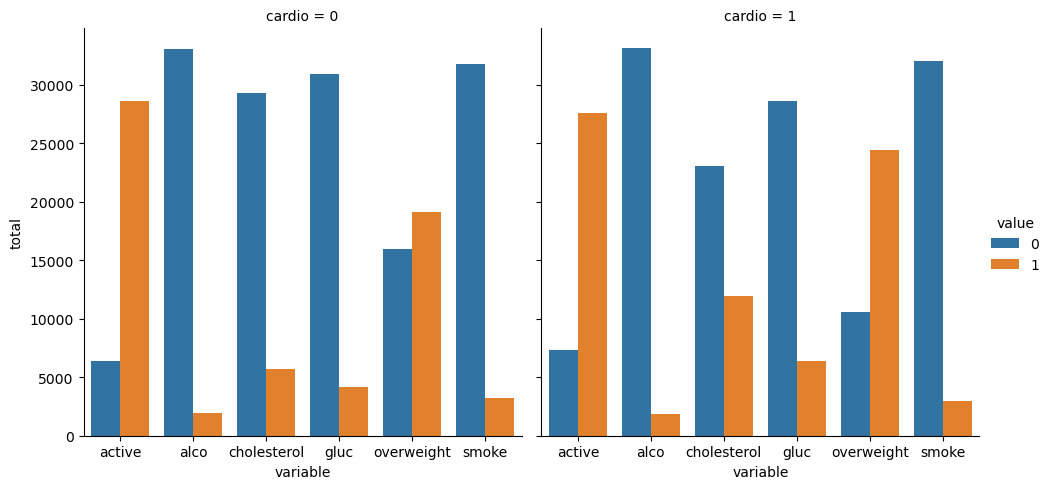

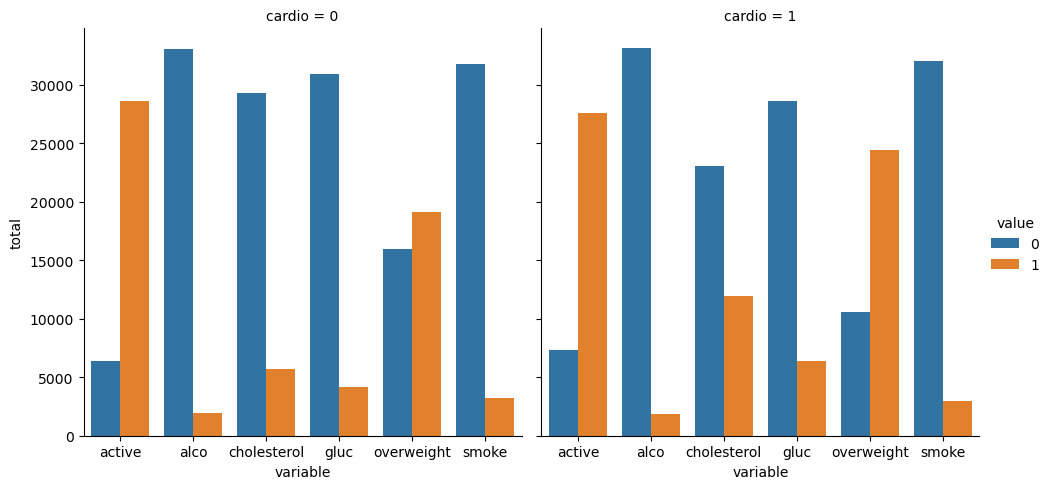

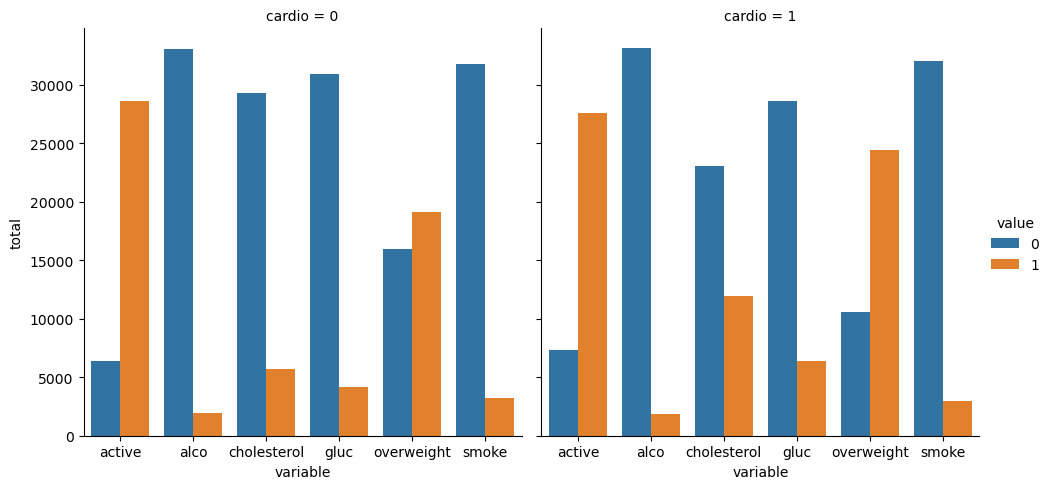

In [2]:
draw_cat_plot()

### Heatmap

[<matplotlib.spines.Spine object at 0x00000121F8F20820>, <matplotlib.axis.XAxis object at 0x00000121F8F20460>, <matplotlib.axis.YAxis object at 0x00000121F8F20FD0>]


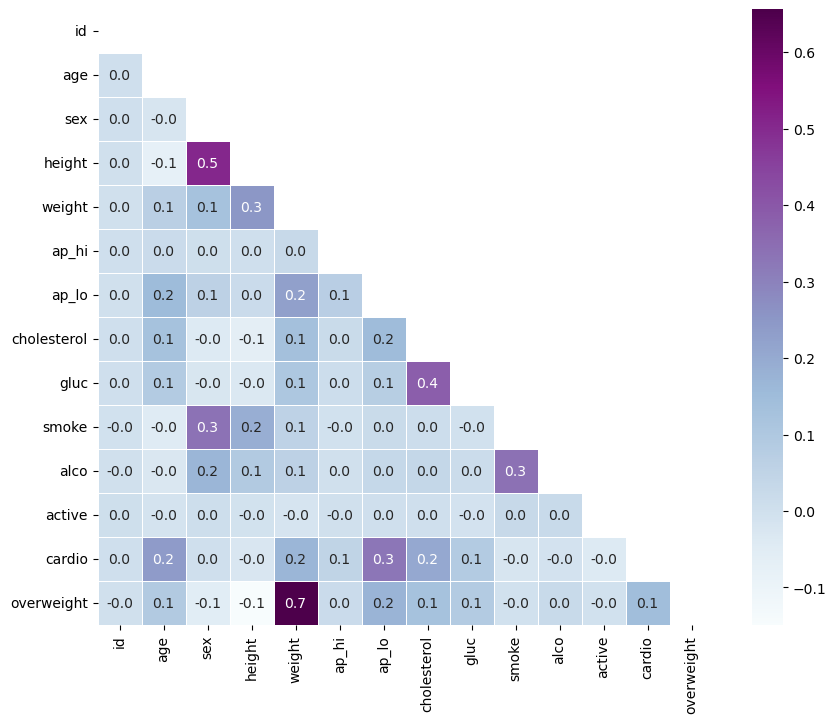

In [3]:
draw_heat_map()